# Webscraping using BeautifulSoup

In [26]:
import requests
import json
import pandas as pd 
import time
from bs4 import BeautifulSoup as bs
import re
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
from nltk import word_tokenize
import nltk
from nltk.corpus import stopwords

## Setting up the link structure

In [3]:
url = "https://bangladeshpost.net"

In [4]:
page_number = 1
search_query = '/search?query=road+accident&page={}'.format(page_number)

In [5]:
road_accident_url_requests_obj = requests.get(url+search_query)
road_accident_url_requests_obj

<Response [200]>

In [6]:
(road_accident_url_requests_obj.status_code)

200

In [7]:
#https://docs.python-requests.org/en/master/
if road_accident_url_requests_obj.status_code == 200:
    road_accident_url_bs_obj = bs(road_accident_url_requests_obj.content, 'html.parser')
(road_accident_url_bs_obj)

<!DOCTYPE html>

<html lang="en">
<head>
<meta charset="utf-8"/> <meta content="width=device-width, initial-scale=1.0" name="viewport"/>
<title>Bangladesh Post | A Daily with a Difference | Latest Online English Daily among Bangladesh Newspapers</title>
<link href="/favicon.ico" rel="icon" type="image/x-icon"/><link href="/favicon.ico" rel="shortcut icon" type="image/x-icon"/>
<link href="/css/frontend/bootstrap/css/bootstrap.min.css" rel="stylesheet"/>
<link href="https://cdnjs.cloudflare.com/ajax/libs/font-awesome/4.5.0/css/font-awesome.min.css" rel="stylesheet"/>
<link href="https://cdnjs.cloudflare.com/ajax/libs/ionicons/2.0.1/css/ionicons.min.css" rel="stylesheet"/>
<link href="/css/frontend/css/AdminLTE.css" rel="stylesheet"/>
<link href="/css/frontend/style.css" rel="stylesheet"/>
<!-- AD CODE -->
<script async="" src="//pagead2.googlesyndication.com/pagead/js/adsbygoogle.js"></script>
<script>
      (adsbygoogle = window.adsbygoogle || []).push({
        google_ad_client: "ca-p

## EDA for webscraping
Explore the BeautifulSoup object

In [8]:
# getting all links from a page
road_accident_sub_url_list = []
for page_number in range(1, 14):
    search_query = '/search?query=road+accident&page={}'.format(page_number)
    road_accident_url_requests_obj = requests.get(url+search_query)
    time.sleep(5)
    if road_accident_url_requests_obj.status_code == 200:
        print(url+search_query)
        road_accident_url_bs_obj = bs(road_accident_url_requests_obj.content, 'html.parser')
        for link in road_accident_url_bs_obj.find_all('a'):
            if (re.search('accident', str(link.get('href')))):
                road_accident_sub_url_list.append(str(link.get('href')))
    else:
        print("{}: failed to open".format(str(url+search_query)))
road_accident_sub_url_list

https://bangladeshpost.net/search?query=road+accident&page=1
https://bangladeshpost.net/search?query=road+accident&page=2
https://bangladeshpost.net/search?query=road+accident&page=3
https://bangladeshpost.net/search?query=road+accident&page=4
https://bangladeshpost.net/search?query=road+accident&page=5
https://bangladeshpost.net/search?query=road+accident&page=6
https://bangladeshpost.net/search?query=road+accident&page=7
https://bangladeshpost.net/search?query=road+accident&page=8
https://bangladeshpost.net/search?query=road+accident&page=9
https://bangladeshpost.net/search?query=road+accident&page=10
https://bangladeshpost.net/search?query=road+accident&page=11
https://bangladeshpost.net/search?query=road+accident&page=12
https://bangladeshpost.net/search?query=road+accident&page=13


['/posts/two-killed-in-habiganj-road-accident-60849',
 '/posts/323-killed-in-road-accidents-during-eid-holiday-60459',
 '/posts/468-people-die-in-road-accidents-in-april-59241',
 '/posts/5-killed-in-sylhet-road-accident-59208',
 '/posts/road-accident-kills-3-in-mymensingh-58993',
 '/posts/road-accident-kills-motorcyclist-in-rangpur-58702',
 '/posts/noble-critically-injured-in-road-accident-58619',
 '/posts/513-die-598-injured-of-road-accidents-in-march-57401',
 '/posts/8-killed-in-faridpur-road-accidents-56458',
 '/posts/2-musicians-killed-in-ctg-road-accident-55877',
 '/posts/2-killed-in-jashore-road-accident-55791',
 '/posts/motorcyclist-killed-in-jashore-road-accident-55632',
 '/posts/2-killed-in-cox-s-bazar-road-accident-54833',
 '/posts/six-killed-in-bogura-road-accidents-54752',
 '/posts/man-killed-in-chuadanga-road-accident-54740',
 '/posts/5-killed-in-sirajganj-road-accident-54564',
 '/posts/2-killed-in-khagrachhari-road-accident-54223',
 '/posts/5-bangladeshi-workers-killed-in

In [9]:
# information on road accidents - comprehensive 
road_accident_sub_url_post_list = []
for sub_url in road_accident_sub_url_list:
    if re.search('posts', str(sub_url)):
        road_accident_sub_url_post_list.append(sub_url)
road_accident_sub_url_post_list

['/posts/two-killed-in-habiganj-road-accident-60849',
 '/posts/323-killed-in-road-accidents-during-eid-holiday-60459',
 '/posts/468-people-die-in-road-accidents-in-april-59241',
 '/posts/5-killed-in-sylhet-road-accident-59208',
 '/posts/road-accident-kills-3-in-mymensingh-58993',
 '/posts/road-accident-kills-motorcyclist-in-rangpur-58702',
 '/posts/noble-critically-injured-in-road-accident-58619',
 '/posts/513-die-598-injured-of-road-accidents-in-march-57401',
 '/posts/8-killed-in-faridpur-road-accidents-56458',
 '/posts/2-musicians-killed-in-ctg-road-accident-55877',
 '/posts/2-killed-in-jashore-road-accident-55791',
 '/posts/motorcyclist-killed-in-jashore-road-accident-55632',
 '/posts/2-killed-in-cox-s-bazar-road-accident-54833',
 '/posts/six-killed-in-bogura-road-accidents-54752',
 '/posts/man-killed-in-chuadanga-road-accident-54740',
 '/posts/5-killed-in-sirajganj-road-accident-54564',
 '/posts/2-killed-in-khagrachhari-road-accident-54223',
 '/posts/5-bangladeshi-workers-killed-in

In [10]:
len(road_accident_sub_url_post_list)

260

In [12]:
#url
#road_accident_sub_url_post_list[0]
#[ road_accident_paragraph_list[index] for index in range(1, len(road_accident_paragraph_list))]
head_line_list = []
road_accident_news_list= []
road_accident_paragraph_list = []

for road_accident_url in road_accident_sub_url_post_list:
    road_accident_post_obj = requests.get('{}{}'.format(url,str(road_accident_url)))
    if road_accident_post_obj.status_code == 200:
        head_line_list.append(bs(road_accident_post_obj.content, 'html.parser').h1.text)
        road_accident_paragraph_list = bs(road_accident_post_obj.content, 'html.parser').\
                                       find('div', attrs={'class':'post-details-content'}).find_all('p')
        road_accident_news_list.append(
            ''.join(
                [road_accident_paragraph_list[index].text for index in range(1, len(road_accident_paragraph_list))]
            )
        )
        

road_accident_news_list


['Two youths were killed in a head-on collision between a motorcycle and a CNG-run auto rickshaw in Natun Bazar area on Habiganj-Srimangal road under Bahubal upazila of Habiganj district on Saturday.The deceased were identified as Jamir Uddin, 40, and his cousin Shakil Ahmed Ramim, 35, of Tabajkhani village under Baniachang upazila of the district.According to local sources, the accident occurred in the area when the victims going to Srimangal by a motorbike collided head-on with a CNG-run auto rickshaw coming from the opposite direction at around 11am, leaving them injured seriously. Later, locals admitted to Habiganj Modern District Sadar Hospital, where on-duty doctor Mitun Roy declared them dead.',
 'Bangladesh Jatri Kalyan Samity revealed the information in a report in a press briefing at the National Press Club in the capital city on Sunday.Mozammel Hoque Chowdhury, secretary general of the organisation said during the event that the movement of public was limited during the holi

In [13]:
road_accident_dict = {
    "title": head_line_list,
    "news": road_accident_news_list
}
road_accident_dataframe = pd.DataFrame(data=road_accident_dict)
road_accident_dataframe.shape

(258, 2)

In [14]:
list_of_stopword = set(STOPWORDS).union(set(stopwords.words("english")))
list_of_stopword.add("road")
list_of_stopword.add("accident")
list_of_stopword.add("accidents")
list_of_stopword.add("said")
len(list_of_stopword)

231

In [17]:
road_accident_dataframe.to_csv('./data/bangladeshpost.csv')

In [18]:
#https://stackoverflow.com/questions/10993612/how-to-remove-xa0-from-string-in-python
#unicode(x.strip()) if x is not None else '' for x in row
def text_preprocessing(statement):
    # statement = str(statement).lower()
    pattern = re.compile('\W')
    statement = re.sub(pattern, ' ', statement)
    statement = str(statement).replace(u'\xa0', u'').replace(',', ' ').replace('.', ' ')
    statement = ' '.join(['' if word.lower() in list_of_stopword else word for word in statement.split()])
    return statement

In [19]:
road_accident_dataframe["title"] = road_accident_dataframe["title"].fillna("").apply(text_preprocessing)
road_accident_dataframe["news"] = road_accident_dataframe["news"].fillna("").apply(text_preprocessing)

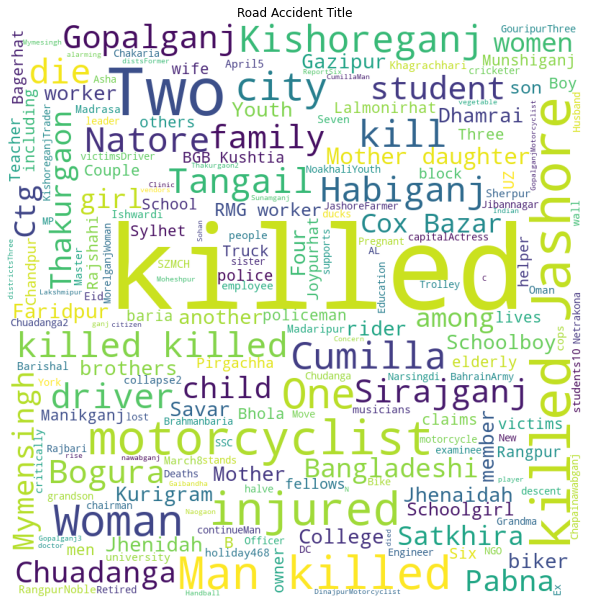

<Figure size 432x288 with 0 Axes>

In [21]:

wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = list_of_stopword,
                min_font_size = 10).generate("".join([ str(word) for word in road_accident_dataframe["title"]]))
  
# plot the WordCloud image                       
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.title("Road Accident Title")
plt.show()
plt.savefig('./visualizations/road_accident_title.png')

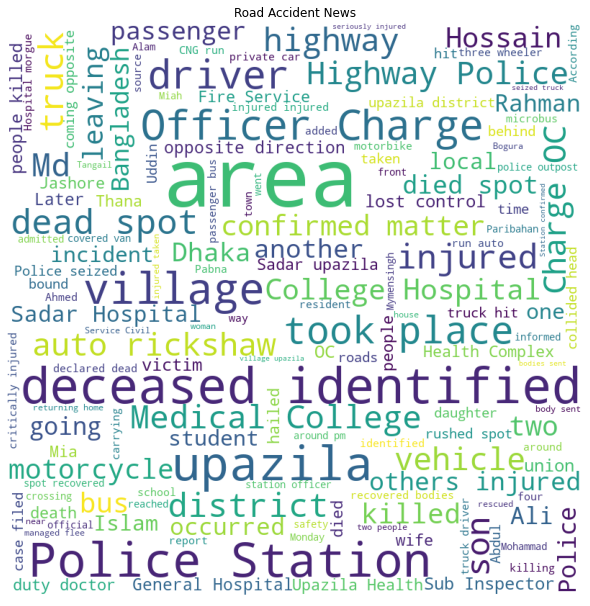

<Figure size 432x288 with 0 Axes>

In [22]:

wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = list_of_stopword,
                min_font_size = 10).generate("".join([ str(word) for word in road_accident_dataframe["news"]]))
  
# plot the WordCloud image                       
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.title("Road Accident News")
plt.show()
plt.savefig('./visualizations/road_accident_news.png')

In [27]:
word_recognize_dict = {}
for road_accident in road_accident_dataframe["news"]:
    text = word_tokenize(str(road_accident))
    text_pos_tag = nltk.pos_tag(text)

    for tag in text_pos_tag:
        if tag[1] not in word_recognize_dict:
            word_recognize_dict[tag[1]] = {}
            if tag[0] not in word_recognize_dict[tag[1]]:
                word_recognize_dict[tag[1]][tag[0]] = 1
            else:
                word_recognize_dict[tag[1]][tag[0]] += 1 
        else:
            if tag[0] not in word_recognize_dict[tag[1]]:
                word_recognize_dict[tag[1]][tag[0]] = 1
            else:
                word_recognize_dict[tag[1]][tag[0]] += 1 
            
word_recognize_dict

{'CD': {'Two': 33,
  '40': 20,
  '35': 29,
  '11am': 2,
  '331': 1,
  '323': 1,
  'two': 94,
  'six': 16,
  '100': 1,
  'three': 54,
  '19': 12,
  '514': 1,
  '139': 1,
  '199': 1,
  '144': 2,
  '45': 23,
  '28': 16,
  '43': 1,
  '03': 1,
  '31': 6,
  '99': 1,
  '121': 1,
  '2016': 1,
  '205': 1,
  '2017': 2,
  '277': 1,
  '2018': 4,
  '232': 1,
  '2019': 2,
  '149': 1,
  '2020': 4,
  'Six': 1,
  'eight': 9,
  '38': 6,
  '14': 8,
  'nine': 10,
  '221': 1,
  '55': 12,
  '64': 2,
  '52': 6,
  '30': 60,
  '20': 14,
  '26': 12,
  '33': 4,
  '8': 36,
  '2021': 1,
  'Ten': 2,
  'four': 27,
  '7': 23,
  '50': 24,
  'five': 30,
  'one': 24,
  'Three': 7,
  '32': 14,
  '36': 5,
  '10': 34,
  '22': 23,
  '12': 14,
  '18': 10,
  '78': 1,
  '63': 1,
  '15': 17,
  '147': 1,
  '138': 1,
  '65': 4,
  '136': 2,
  '82': 1,
  '119': 1,
  '51': 1,
  '98': 1,
  '42': 5,
  '17': 7,
  '84': 1,
  '668': 1,
  'seven': 3,
  '517': 1,
  '406': 1,
  '00': 41,
  'One': 14,
  '41': 2,
  '5': 15,
  '30am': 10,
  '9

In [29]:
with open('./data/bangladeshpost.json', 'w') as outfile: 
    json.dump(word_recognize_dict, outfile)